In [46]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from tabulate import tabulate

In [47]:
def get_data_from_api(url):

    response = requests.get(url)

    data = response.json()

    return data

def create_dataframe(data):

    df = pd.DataFrame(data)

    return df

def get_complete_dataframe(api_url):

    url = api_url

    complete_data = []

    offset = 0

    limit = 1000

    while True:

        url = api_url + f"?$offset={offset}&$limit={limit}"

        data = get_data_from_api(url)

        complete_data.extend(data)

        if len(data) < limit:

            break

        offset += limit


    dataframe = create_dataframe(complete_data)

    return dataframe

# API URL

api_url = "https://data.cityofnewyork.us/resource/mv4k-y93f.json"

# Get the complete DataFrame

nyc_summon = get_complete_dataframe(api_url)

In [48]:
print("Data shape:", nyc_summon.shape)

Data shape: (21724, 22)


In [49]:
nyc_summon = nyc_summon.rename(columns = {':@computed_region_efsh_h5xi' : 'Zip_Codes',
                                          ':@computed_region_f5dn_yrer' : 'Community Districts',
                                          ':@computed_region_yeji_bk3q' : 'Borough Boundaries',
                                          ':@computed_region_92fq_4b7q' : 'City Council Districts' ,
                                          ':@computed_region_sbqj_enih' : 'Police Precincts'})

In [50]:
nyc_summon.head(5)

,summons_key,summons_date,offense_description,law_section_number,law_description,summons_category_type,age_group,sex,race,jurisdiction_code,...,x_coordinate_cd,y_coordinate_cd,latitude,longitude,geocoded_column,Zip_Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,262694309,2023-01-28T00:00:00.000,DISORDERLY PREMISE,106-6,ABC,ABC,65+,F,WHITE HISPANIC,0,...,1006499,233565,40.80773,-73.91963,"{'type': 'Point', 'coordinates': [-73.91963, 4...",10932,49,5,35,23
1,262490655,2023-01-25T00:00:00.000,SMOKING IN A STORE,27-4274,(null),(null),18-24,M,WHITE HISPANIC,0,...,989330,189097,40.685705,-73.981681,"{'type': 'Point', 'coordinates': [-73.981681, ...",17619,68,2,38,54
2,262604725,2023-01-27T00:00:00.000,RECKLESS DRIVING,1212,VTL,VTL,25-44,M,BLACK,0,...,995876,174823,40.64651772,-73.95810499,"{'type': 'Point', 'coordinates': [-73.95810499...",13510,60,2,11,43
3,264134676,2023-02-23T00:00:00.000,RECKLESS DRIVING,1212,VTL,VTL,25-44,M,WHITE HISPANIC,0,...,1019953,238985,40.82256201,-73.87100164,"{'type': 'Point', 'coordinates': [-73.87100164...",11611,58,5,31,26
4,265775874,2023-03-28T00:00:00.000,ALCOHOLIC BEVERAGE IN PUBLIC,10-125(2B),(null),(null),25-44,M,WHITE,0,...,982661,175286,40.647798,-74.005723,"{'type': 'Point', 'coordinates': [-74.005723, ...",18180,9,2,7,45


In [51]:
nyc_summon.tail(5)

,summons_key,summons_date,offense_description,law_section_number,law_description,summons_category_type,age_group,sex,race,jurisdiction_code,...,x_coordinate_cd,y_coordinate_cd,latitude,longitude,geocoded_column,Zip_Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
21719,264026696,2023-02-22T00:00:00.000,FEDERAL MOTOR VEH. SAFETY REG,CFR 49,NYS Transportation,NYS TRANS,UNKNOWN,(null),(null),0,...,982611,202413,40.72225345,-74.00591294,"{'type': 'Point', 'coordinates': [-74.00591294...",12076,57,4,32,1
21720,262033003,2023-01-17T00:00:00.000,UNLICENSED GENERAL VENDOR,20-453,Administrative Code,VENDING,45-64,M,BLACK,0,...,988912,212647,40.75034217,-73.98317401,"{'type': 'Point', 'coordinates': [-73.98317401...",12078,11,4,51,8
21721,264671196,2023-03-05T00:00:00.000,ALCOHOLIC BEVERAGE IN PUBLIC,10-125(2B),(null),(null),25-44,M,BLACK,0,...,1014313,254123,40.86413235,-73.89131161,"{'type': 'Point', 'coordinates': [-73.89131161...",10936,24,5,22,34
21722,265612207,2023-03-24T00:00:00.000,NON PAYMENT OF FARE (OTHER),1050.4(A),(null),(null),25-44,M,BLACK,1,...,1052169,159422,40.60400282,-73.75540592,"{'type': 'Point', 'coordinates': [-73.75540592...",20529,51,3,47,59
21723,263577618,2023-02-14T00:00:00.000,FEDERAL MOTOR VEH. SAFETY REG,CFR 49,NYS Transportation,NYS TRANS,UNKNOWN,(null),(null),0,...,984166,188346,40.6836512406856,-74.0003043120176,"{'type': 'Point', 'coordinates': [-74.00030431...",13514,14,2,27,48


In [52]:
nyc_summon.dtypes

summons_key               object
summons_date              object
offense_description       object
law_section_number        object
law_description           object
summons_category_type     object
age_group                 object
sex                       object
race                      object
jurisdiction_code         object
boro                      object
precinct_of_occur         object
x_coordinate_cd           object
y_coordinate_cd           object
latitude                  object
longitude                 object
geocoded_column           object
Zip_Codes                 object
Community Districts       object
Borough Boundaries        object
City Council Districts    object
Police Precincts          object
dtype: object

In [53]:
nyc_summon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21724 entries, 0 to 21723
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   summons_key             21724 non-null  object
 1   summons_date            21724 non-null  object
 2   offense_description     21724 non-null  object
 3   law_section_number      21724 non-null  object
 4   law_description         21724 non-null  object
 5   summons_category_type   21724 non-null  object
 6   age_group               21724 non-null  object
 7   sex                     21724 non-null  object
 8   race                    21724 non-null  object
 9   jurisdiction_code       21724 non-null  object
 10  boro                    21724 non-null  object
 11  precinct_of_occur       21724 non-null  object
 12  x_coordinate_cd         21724 non-null  object
 13  y_coordinate_cd         21724 non-null  object
 14  latitude                21724 non-null  object
 15  lo

In [54]:
nyc_summon.isnull().sum() #sum of the nulls

summons_key                0
summons_date               0
offense_description        0
law_section_number         0
law_description            0
summons_category_type      0
age_group                  0
sex                        0
race                       0
jurisdiction_code          0
boro                       0
precinct_of_occur          0
x_coordinate_cd            0
y_coordinate_cd            0
latitude                   0
longitude                  0
geocoded_column            0
Zip_Codes                 93
Community Districts        1
Borough Boundaries         1
City Council Districts     1
Police Precincts           1
dtype: int64

In [55]:
nyc_summon = nyc_summon.dropna()

In [56]:
print("Missing values after dropping:\n", nyc_summon.isnull().sum())

Missing values after dropping:
 summons_key               0
summons_date              0
offense_description       0
law_section_number        0
law_description           0
summons_category_type     0
age_group                 0
sex                       0
race                      0
jurisdiction_code         0
boro                      0
precinct_of_occur         0
x_coordinate_cd           0
y_coordinate_cd           0
latitude                  0
longitude                 0
geocoded_column           0
Zip_Codes                 0
Community Districts       0
Borough Boundaries        0
City Council Districts    0
Police Precincts          0
dtype: int64


In [57]:
nyc_summon['boro'].value_counts().sort_index() #total of each unique count from borough

BRONX            5689
BROOKLYN         8130
MANHATTAN        3829
NEW YORK           40
QUEENS           3602
STATEN ISLAND     340
Name: boro, dtype: int64

In [58]:
nyc_summon['race'].value_counts().sort_index() #total of each unique count from race

(null)                            5567
AMERICAN INDIAN/ALASKAN NATIVE     141
ASIAN / PACIFIC ISLANDER          1106
BLACK                             7443
BLACK HISPANIC                    1477
OTHER                               66
UNKNOWN                            224
WHITE                             1296
WHITE HISPANIC                    4310
Name: race, dtype: int64

In [59]:
nyc_summon['age_group'].value_counts().sort_index() #total of each unique count from age group

18-24      3264
25-44      8591
45-64      3438
65+         273
<18         459
UNKNOWN    5605
Name: age_group, dtype: int64

In [60]:
nyc_summon['sex'].value_counts().sort_index() #total of each unique count from sex

(null)     5567
F          1748
M         14234
U            81
Name: sex, dtype: int64

In [61]:
nyc_summon['jurisdiction_code'].value_counts().sort_index() #total of each unique count from jurisdiction code

0    17867
1      763
2     3000
Name: jurisdiction_code, dtype: int64

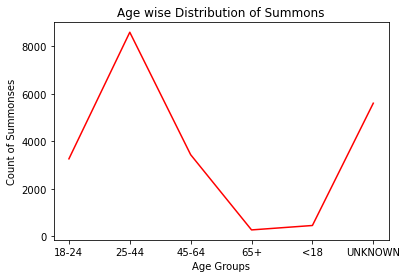

In [62]:
data1 = nyc_summon['age_group']
counts = data1.value_counts().sort_index()
plt.plot(counts.index, counts.values, color = 'red')  #line plot for age-wise distribution of summonses
plt.xlabel('Age Groups')
plt.ylabel('Count of Summonses')
plt.title('Age wise Distribution of Summons')
plt.show()

C:\Users\swath\AppData\Local\Temp\ipykernel_20776\3413090218.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90);


Text(0.5, 1.0, 'Count of Summons based on BORO')

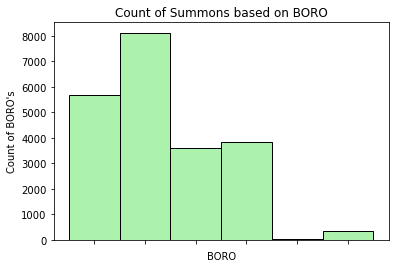

In [63]:
#histplot for count of summonses based on borough

bar1 = sns.histplot(nyc_summon['boro'],
                    color = 'lightgreen')
bar1.set_xticklabels(bar1.get_xticklabels(), rotation = 90);
plt.xlabel("BORO")
plt.ylabel("Count of BORO's")
plt.title("Count of Summons based on BORO")

In [64]:
u_sex = nyc_summon['sex'].value_counts().sort_index() #total of each unique count from sex
u_sex

(null)     5567
F          1748
M         14234
U            81
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

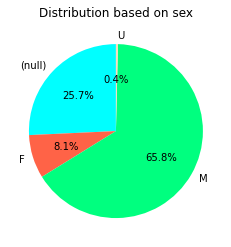

In [65]:
#piechart based on distribution of different sex involved in summonses

colors = ['cyan', 'tomato', 'springgreen', 'peachpuff']
plt.pie(u_sex, autopct = '%.1f%%', labels = u_sex.index, startangle= 90, colors = colors)
plt.title('Distribution based on sex')
plt.show


In [66]:
#getting the total count of summonses for each month

nyc_summon1 = nyc_summon
nyc_summon1['summons_date'] = pd.to_datetime(nyc_summon1['summons_date'])
nyc_summon1['month'] = nyc_summon1['summons_date'].dt.month
month_counts = nyc_summon1.groupby('month').size()
month_counts


month
1    6946
2    6596
3    8088
dtype: int64

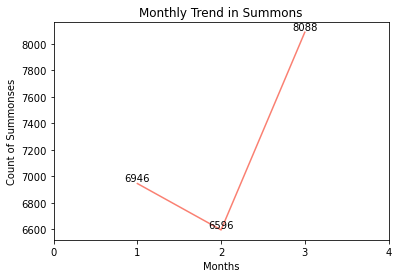

In [67]:
#line plot the monthly trend of summonses

plt.plot(month_counts.index, month_counts.values, marker = '', color = 'salmon')
plt.xticks(range(len(month_counts.index)+2))
for x,y in zip(month_counts.index, month_counts.values):
  plt.text(x,y, str(y), ha = 'center', va = 'bottom')
plt.title('Monthly Trend in Summons')
plt.xlabel('Months')
plt.ylabel('Count of Summonses')
plt.show()

In [68]:
#correlation matrix for the summons data with rounded value of 2

corr = nyc_summon.corr().round(2)
corr

,month
month,1.0


<AxesSubplot:>

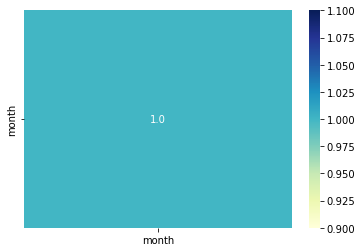

In [69]:
#heatmap of the correlation matrix plotted above

corrplot = sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt = "0.1f")
corrplot

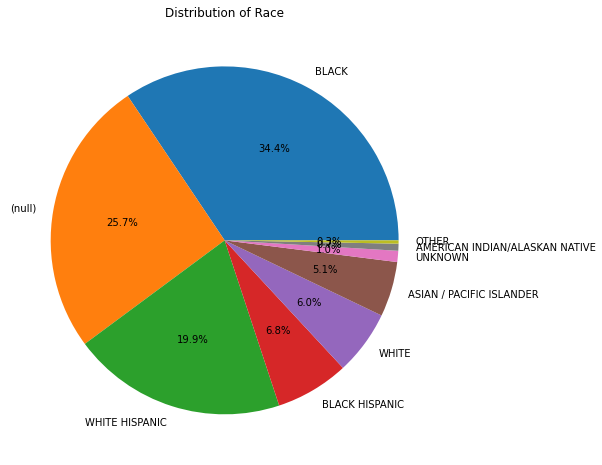

In [70]:
import functions

# Call the function with the appropriate data
functions.plot_race_distribution(nyc_summon)


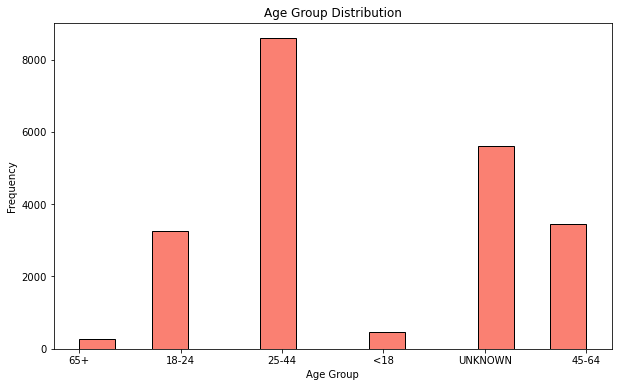

In [71]:
from functions import plot_age_group_distribution

# Assuming you have loaded the data into the 'nyc_summon' DataFrame
plot_age_group_distribution(nyc_summon)


<Figure size 720x432 with 0 Axes>

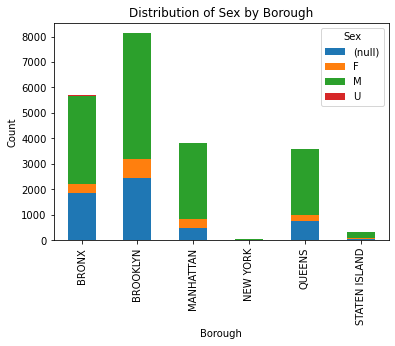

In [72]:
borough_sex_counts = nyc_summon.groupby(['boro', 'sex']).size().unstack()

plt.figure(figsize=(10, 6))
borough_sex_counts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Distribution of Sex by Borough')
plt.legend(title='Sex')
plt.show()

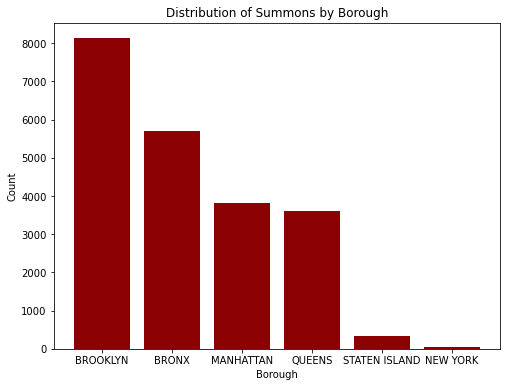

In [73]:
plt.figure(figsize=(8, 6))
borough_counts = nyc_summon['boro'].value_counts()
plt.bar(borough_counts.index, borough_counts.values, color = 'darkred')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Distribution of Summons by Borough')
plt.show()

<Figure size 720x432 with 0 Axes>

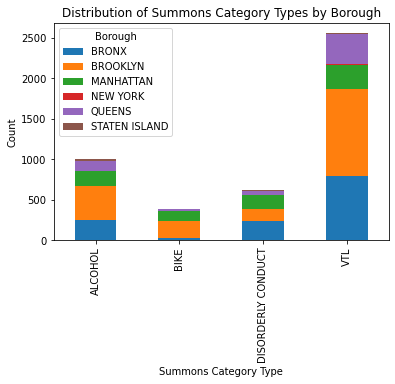

In [42]:
# Select specific types from summons_category_type variable
selected_types = ['BIKE', 'ALCOHOL', 'DISORDERLY CONDUCT', 'VTL']

# Filter the DataFrame based on selected types
filtered_data = nyc_summon[nyc_summon['summons_category_type'].isin(selected_types)]

# Create a cross-tabulation of summons_category_type and boro
cross_tab = pd.crosstab(filtered_data['summons_category_type'], filtered_data['boro'])

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Summons Category Type')
plt.ylabel('Count')
plt.title('Distribution of Summons Category Types by Borough')
plt.legend(title='Borough')
plt.show()

In [74]:
#Select the features and target variables
features = nyc_summon[['age_group', 'race', 'sex', 'offense_description', 'jurisdiction_code']]
target = nyc_summon['summons_category_type']

#Performing one-hot encoding on the categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(features.select_dtypes(include='object')))
numerical_features = features.select_dtypes(exclude='object').reset_index(drop=True)
encoded_features = pd.concat([encoded_features, numerical_features], axis=1)

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.3, random_state=42)

#Converting feature columns into strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

#Calling the KNeighborsClassifier
model = KNeighborsClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predicting the target variable
predictions = model.predict(X_test)

#The accuracy score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#Calculating the evaluation matrix
report = classification_report(y_test, predictions)

# Print the classification report
print("Classification Report:\n", report)

Accuracy: 0.9462166743720142
Classification Report:
                         precision    recall  f1-score   support

                (null)       0.94      0.96      0.95      2634
                   ABC       1.00      0.26      0.41        31
               AIR GUN       1.00      0.53      0.69        17
               ALCOHOL       0.98      0.99      0.98       314
                  AMMO       1.00      1.00      1.00         1
             AVIGATION       0.00      0.00      0.00         1
                  BIKE       0.97      0.98      0.98       128
              BUSINESS       1.00      0.33      0.50         3
    DISORDERLY CONDUCT       0.99      0.88      0.93       187
                   DOG       1.00      0.12      0.22         8
         EDUCATION LAW       1.00      1.00      1.00         3
              EXPOSURE       0.00      0.00      0.00         5
             FIREWORKS       1.00      0.67      0.80         3
              GAMBLING       0.00      0.00      0

C:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#printing the accuracy in the table

table_data = [["Accuracy", f"\033[92m{accuracy:.2f}\033[0m"]]
table = tabulate(table_data, headers=["Metric", "Value"], tablefmt="pipe")
print(table)

| Metric   |   Value |
|:---------|--------:|
| Accuracy |    0.95 |


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Select the features and target variables
features = nyc_summon[['age_group', 'race', 'sex', 'offense_description', 'jurisdiction_code']]
target = nyc_summon['summons_category_type']

# Perform one-hot encoding on the categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(features.select_dtypes(include='object')))
numerical_features = features.select_dtypes(exclude='object').reset_index(drop=True)
encoded_features = pd.concat([encoded_features, numerical_features], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
predictions = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate the evaluation metrics
report = classification_report(y_test, predictions)

# Print the classification report
print("Classification Report:\n", report)

Accuracy: 0.9693327169055325


C:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                         precision    recall  f1-score   support

                (null)       0.98      0.96      0.97      2634
                   ABC       1.00      0.68      0.81        31
               AIR GUN       1.00      0.94      0.97        17
               ALCOHOL       1.00      1.00      1.00       314
                  AMMO       1.00      1.00      1.00         1
             AVIGATION       0.00      0.00      0.00         1
                  BIKE       1.00      1.00      1.00       128
              BUSINESS       1.00      0.33      0.50         3
    DISORDERLY CONDUCT       1.00      0.99      1.00       187
                   DOG       1.00      0.25      0.40         8
         EDUCATION LAW       1.00      1.00      1.00         3
              EXPOSURE       1.00      0.40      0.57         5
             FIREWORKS       1.00      1.00      1.00         3
              GAMBLING       0.00      0.00      0.00         2
          HARAS

C:\Users\swath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
